# Scraping NFL Data to Predict Future Game Winners

In [1]:
# common imports
import requests
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

# website to pull data from (2021)
url = "https://www.pro-football-reference.com/years/2021/"

A look at the table we will be fetching data from.

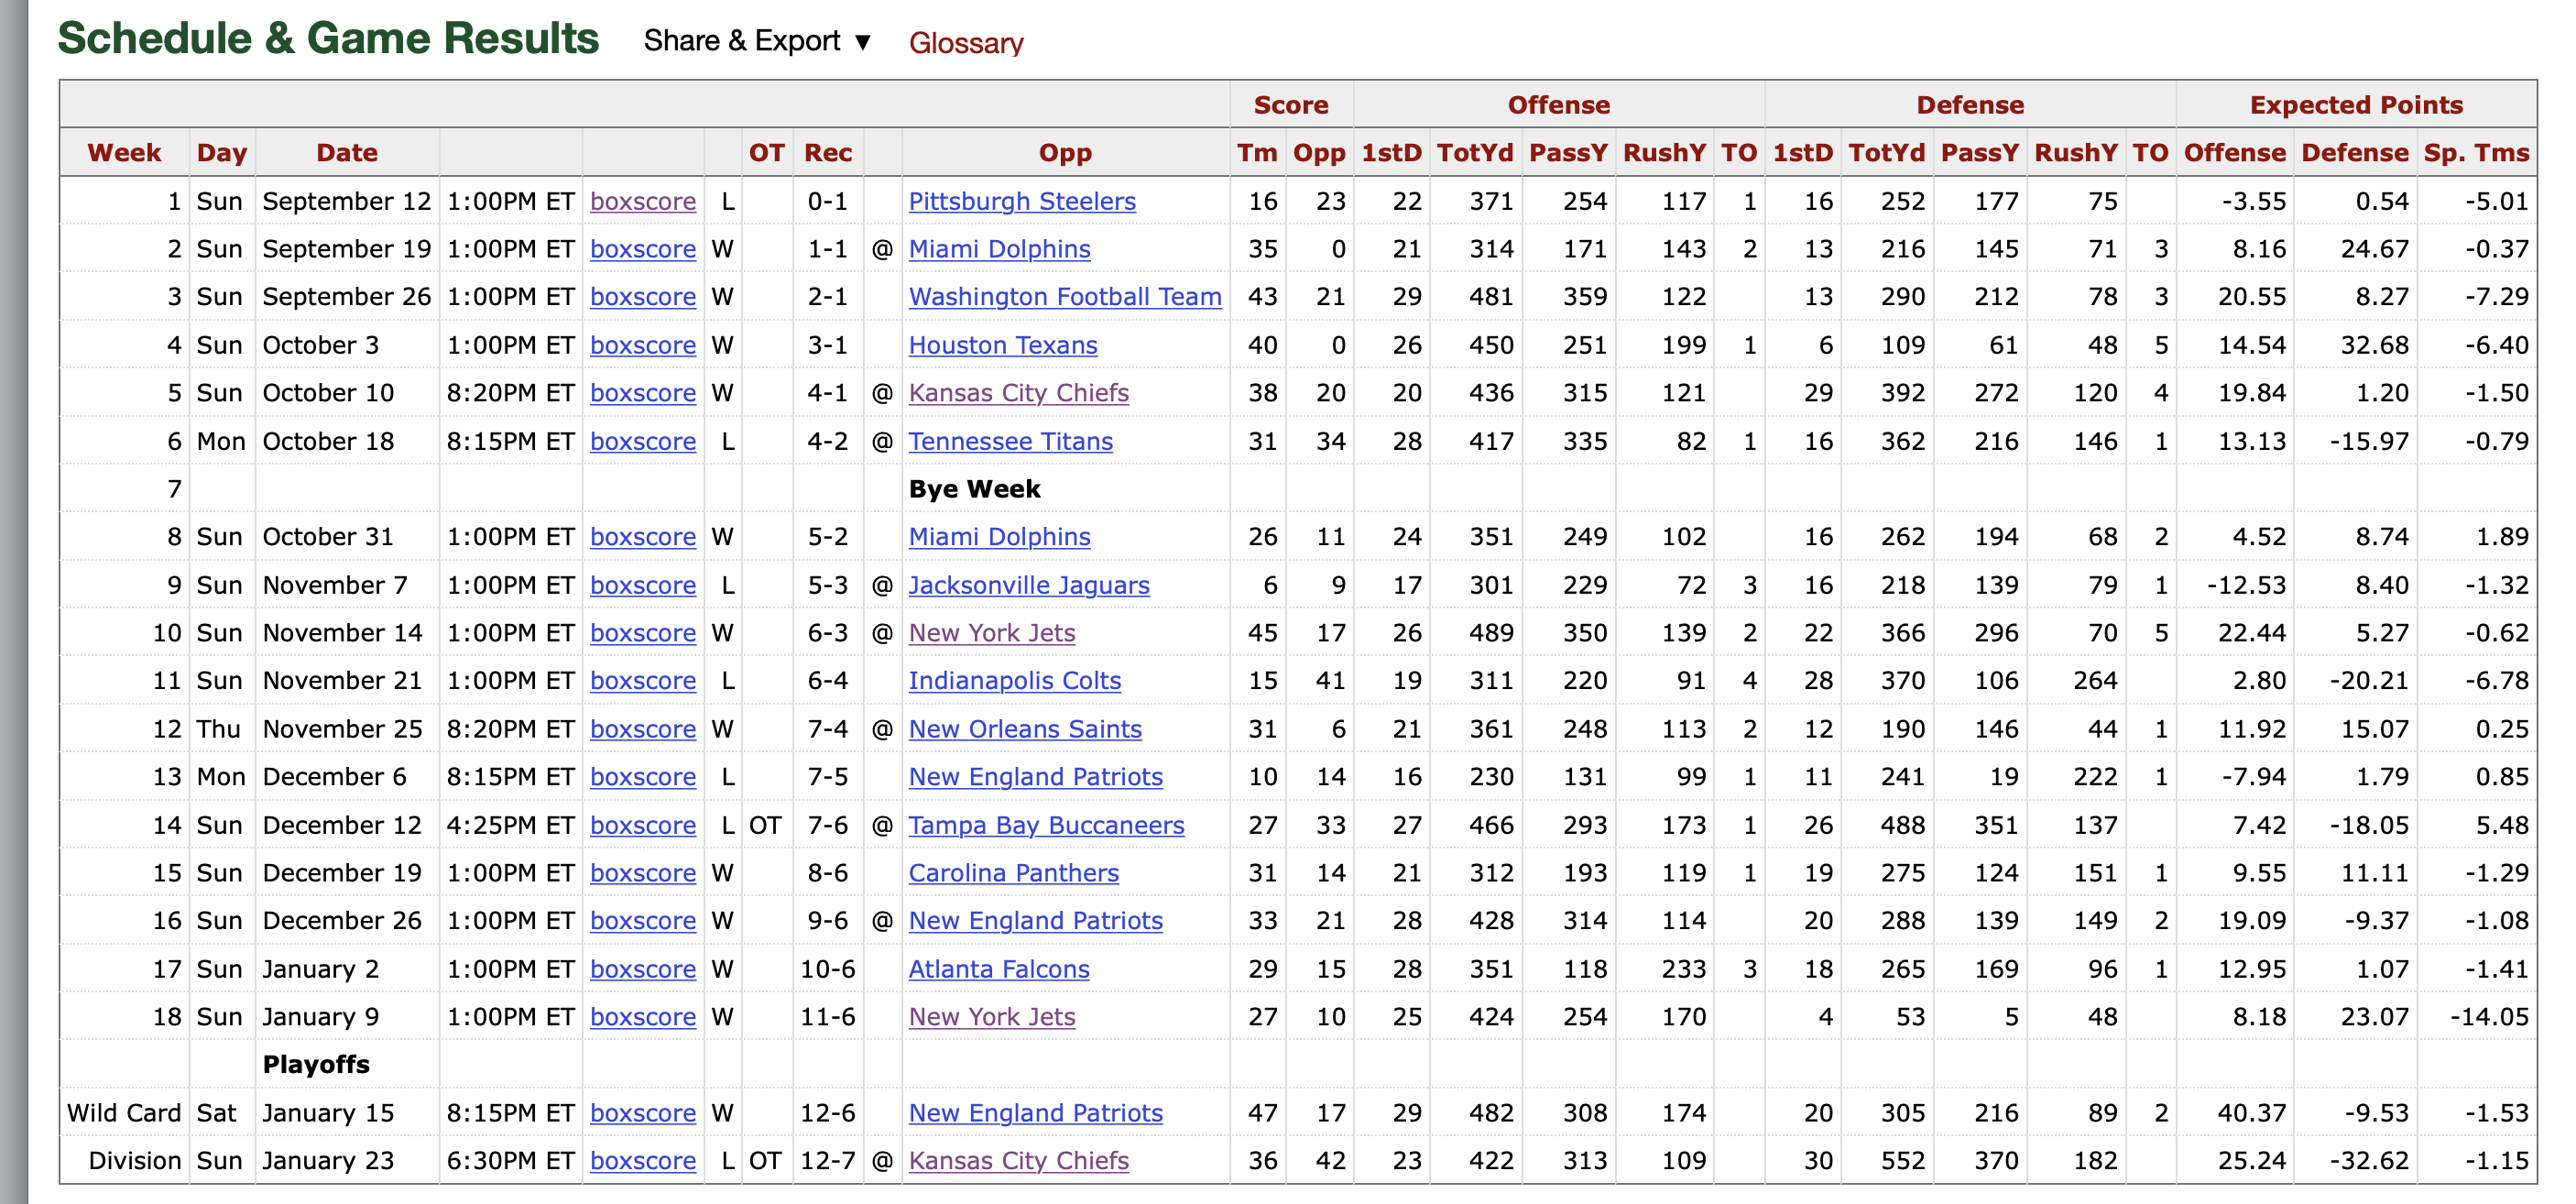

### Gathering the necessary links and urls 

In [2]:
data = requests.get(url)

In [3]:
soup = BeautifulSoup(data.text)

In [4]:
first = soup.select('div.content_grid')[0]

In [5]:
type(first)

bs4.element.Tag

In [6]:
links = first.find_all('a')
links

[<a href="/teams/buf/2021.htm">Buffalo Bills</a>,
 <a href="/teams/nwe/2021.htm">New England Patriots</a>,
 <a href="/teams/mia/2021.htm">Miami Dolphins</a>,
 <a href="/teams/nyj/2021.htm">New York Jets</a>,
 <a href="/teams/cin/2021.htm">Cincinnati Bengals</a>,
 <a href="/teams/pit/2021.htm">Pittsburgh Steelers</a>,
 <a href="/teams/cle/2021.htm">Cleveland Browns</a>,
 <a href="/teams/rav/2021.htm">Baltimore Ravens</a>,
 <a href="/teams/oti/2021.htm">Tennessee Titans</a>,
 <a href="/teams/clt/2021.htm">Indianapolis Colts</a>,
 <a href="/teams/htx/2021.htm">Houston Texans</a>,
 <a href="/teams/jax/2021.htm">Jacksonville Jaguars</a>,
 <a href="/teams/kan/2021.htm">Kansas City Chiefs</a>,
 <a href="/teams/rai/2021.htm">Las Vegas Raiders</a>,
 <a href="/teams/sdg/2021.htm">Los Angeles Chargers</a>,
 <a href="/teams/den/2021.htm">Denver Broncos</a>,
 <a href="/teams/dal/2021.htm">Dallas Cowboys</a>,
 <a href="/teams/phi/2021.htm">Philadelphia Eagles</a>,
 <a href="/teams/was/2021.htm">Wash

In [7]:
# list comprehension to obtain hrefs
links = [l.get("href") for l in links]
links

['/teams/buf/2021.htm',
 '/teams/nwe/2021.htm',
 '/teams/mia/2021.htm',
 '/teams/nyj/2021.htm',
 '/teams/cin/2021.htm',
 '/teams/pit/2021.htm',
 '/teams/cle/2021.htm',
 '/teams/rav/2021.htm',
 '/teams/oti/2021.htm',
 '/teams/clt/2021.htm',
 '/teams/htx/2021.htm',
 '/teams/jax/2021.htm',
 '/teams/kan/2021.htm',
 '/teams/rai/2021.htm',
 '/teams/sdg/2021.htm',
 '/teams/den/2021.htm',
 '/teams/dal/2021.htm',
 '/teams/phi/2021.htm',
 '/teams/was/2021.htm',
 '/teams/nyg/2021.htm',
 '/teams/gnb/2021.htm',
 '/teams/min/2021.htm',
 '/teams/chi/2021.htm',
 '/teams/det/2021.htm',
 '/teams/tam/2021.htm',
 '/teams/nor/2021.htm',
 '/teams/atl/2021.htm',
 '/teams/car/2021.htm',
 '/teams/ram/2021.htm',
 '/teams/crd/2021.htm',
 '/teams/sfo/2021.htm',
 '/teams/sea/2021.htm']

In [8]:
# list comprehension to build all the urls.
team_urls = [f"https://www.pro-football-reference.com/{l}" for l in links]
team_urls

['https://www.pro-football-reference.com//teams/buf/2021.htm',
 'https://www.pro-football-reference.com//teams/nwe/2021.htm',
 'https://www.pro-football-reference.com//teams/mia/2021.htm',
 'https://www.pro-football-reference.com//teams/nyj/2021.htm',
 'https://www.pro-football-reference.com//teams/cin/2021.htm',
 'https://www.pro-football-reference.com//teams/pit/2021.htm',
 'https://www.pro-football-reference.com//teams/cle/2021.htm',
 'https://www.pro-football-reference.com//teams/rav/2021.htm',
 'https://www.pro-football-reference.com//teams/oti/2021.htm',
 'https://www.pro-football-reference.com//teams/clt/2021.htm',
 'https://www.pro-football-reference.com//teams/htx/2021.htm',
 'https://www.pro-football-reference.com//teams/jax/2021.htm',
 'https://www.pro-football-reference.com//teams/kan/2021.htm',
 'https://www.pro-football-reference.com//teams/rai/2021.htm',
 'https://www.pro-football-reference.com//teams/sdg/2021.htm',
 'https://www.pro-football-reference.com//teams/den/202

### Let's start by only using one url first

In [9]:
first = team_urls[0]
first

'https://www.pro-football-reference.com//teams/buf/2021.htm'

In [10]:
firstdata = requests.get(first)

In [11]:
type(firstdata)

requests.models.Response

In [12]:
sched1 = pd.read_html(firstdata.text, header = None, match = "Schedule & Game Results")

In [13]:
df = sched1[0]

In [14]:
df.columns = df.columns.droplevel()
df

,Week,Day,Date,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,OT,Rec,Unnamed: 8_level_1,Opp,...,RushY,TO,1stD,TotYd,PassY,RushY,TO,Offense,Defense,Sp. Tms
0,1,Sun,September 12,1:00PM ET,boxscore,L,NaN,0-1,NaN,Pittsburgh Steelers,...,117.0,1.0,16.0,252.0,177.0,75.0,NaN,-3.55,0.54,-5.01
1,2,Sun,September 19,1:00PM ET,boxscore,W,NaN,1-1,@,Miami Dolphins,...,143.0,2.0,13.0,216.0,145.0,71.0,3.0,8.16,24.67,-0.37
2,3,Sun,September 26,1:00PM ET,boxscore,W,NaN,2-1,NaN,Washington Football Team,...,122.0,NaN,13.0,290.0,212.0,78.0,3.0,20.55,8.27,-7.29
3,4,Sun,October 3,1:00PM ET,boxscore,W,NaN,3-1,NaN,Houston Texans,...,199.0,1.0,6.0,109.0,61.0,48.0,5.0,14.54,32.68,-6.40
4,5,Sun,October 10,8:20PM ET,boxscore,W,NaN,4-1,@,Kansas City Chiefs,...,121.0,NaN,29.0,392.0,272.0,120.0,4.0,19.84,1.20,-1.50
5,6,Mon,October 18,8:15PM ET,boxscore,L,NaN,4-2,@,Tennessee Titans,...,82.0,1.0,16.0,362.0,216.0,146.0,1.0,13.13,-15.97,-0.79
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bye Week,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Sun,October 31,1:00PM ET,boxscore,W,NaN,5-2,NaN,Miami Dolphins,...,102.0,NaN,16.0,262.0,194.0,68.0,2.0,4.52,8.74,1.89
8,9,Sun,November 7,1:00PM ET,boxscore,L,NaN,5-3,@,Jacksonville Jaguars,...,72.0,3.0,16.0,218.0,139.0,79.0,1.0,-12.53,8.40,-1.32
9,10,Sun,November 14,1:00PM ET,boxscore,W,NaN,6-3,@,New York Jets,...,139.0,2.0,22.0,366.0,296.0,70.0,5.0,22.44,5.27,-0.62


### Scraping the Website for all teams and desired years with a for loop

In [15]:
# creating a list of years in descending order and an empty list to add dataframes to.
years = list(range(2022, 1993, -1))
all_games = []

In [16]:
# restating the website we will fetch data from, but this time starting with the current 2022 season
url = "https://www.pro-football-reference.com/years/2022/"

In [17]:
# the outer/first for loop creates a list of links that the inner/second for loop will iterate through.
# we also change the year of the url at the end of the first for loop so new links can be generated from previous seasons.
# the second for loop reads in the data and appends it to the empty list all_games.
# the second loop also creates two new columns (Season and Team) to track which team and year each record belongs to.
# we also perform some initial data cleansing such as dropping a column level and capitalizing team name abbreviations.

for year in years:
    data = requests.get(url)
    soup = BeautifulSoup(data.text)
    first = soup.select('div.content_grid')[0]
    links = first.find_all('a')
    links = [l.get("href") for l in links]
    team_urls = [f"https://www.pro-football-reference.com/{l}" for l in links]
    url = url.replace(str(year), str(int(year)-1))
    
    for team_url in team_urls:
        team_name = team_url.split("/")[-2]
        firstdata = requests.get(team_url)
        sched = pd.read_html(firstdata.text, header = None, match = "Schedule & Game Results")
        df = sched[0]
        df.columns = df.columns.droplevel()
        
        df["Season"] = year
        df["Team"] = team_name.upper()
        all_games.append(df)
        #time.sleep(1) # added to not stress the website with requests, but this line causes the entire loop to hang

In [18]:
# the number of dataframes collected
len(all_games)

913

In [19]:
# viewing one of the last dataframes to verify the correct year and schedule was pulled for the respective team.
all_games[0]
all_games[912]

,Week,Day,Date,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,OT,Rec,Unnamed: 8_level_1,Opp,...,1stD,TotYd,PassY,RushY,TO,Offense,Defense,Sp. Tms,Season,Team
0,1,Sun,September 4,4:00PM ET,boxscore,W,NaN,1-0,NaN,Arizona Cardinals,...,23.0,234.0,128.0,106.0,3.0,-17.92,15.09,-1.36,1994,RAM
1,2,Sun,September 11,1:00PM ET,boxscore,L,NaN,1-1,@,Atlanta Falcons,...,24.0,428.0,304.0,124.0,2.0,-4.86,-15.12,1.74,1994,RAM
2,3,Sun,September 18,4:00PM ET,boxscore,L,NaN,1-2,NaN,San Francisco 49ers,...,28.0,454.0,349.0,105.0,1.0,-0.32,-15.85,-1.57,1994,RAM
3,4,Sun,September 25,1:00PM ET,boxscore,W,NaN,2-2,@,Kansas City Chiefs,...,17.0,242.0,166.0,76.0,3.0,0.83,14.62,1.91,1994,RAM
4,5,Sun,October 2,4:00PM ET,boxscore,L,NaN,2-3,NaN,Atlanta Falcons,...,23.0,366.0,285.0,81.0,1.0,-11.83,-4.81,6.43,1994,RAM
5,6,Sun,October 9,1:00PM ET,boxscore,L,NaN,2-4,@,Green Bay Packers,...,21.0,292.0,208.0,84.0,2.0,-12.67,4.98,-0.73,1994,RAM
6,7,Sun,October 16,4:00PM ET,boxscore,W,NaN,3-4,NaN,New York Giants,...,14.0,282.0,161.0,121.0,2.0,1.26,12.27,0.48,1994,RAM
7,8,Sun,October 23,1:00PM ET,boxscore,L,NaN,3-5,@,New Orleans Saints,...,18.0,314.0,196.0,118.0,1.0,-13.61,6.28,10.30,1994,RAM
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bye Week,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,RAM
9,10,Sun,November 6,4:00PM ET,boxscore,W,NaN,4-5,NaN,Denver Broncos,...,24.0,284.0,236.0,48.0,NaN,11.97,-3.95,-1.34,1994,RAM


In [20]:
# used the following function to check column names for duplicates and other discrepancies.
# initially my list of dataframes were not combining due to an index error.
# this function helped me visualize column names for each dataframe, however, it does not need to be run now.

#def check_dups(index, n):
    #s = set(index)
    #if len(s) != len(index):
        #print(f'df_list[{n}]:', index, end='\n\n')

#for n, df in enumerate(all_games):
    #check_dups(df.columns, n)

### Combining the dataframes and making some edits

In [21]:
# combining all dataframes into one dataframe
gamesdf = pd.concat(all_games)

In [22]:
# transforming all column names to lowercase so exploratory analysis will be easier to perform.
# taking a peek at the new df.
gamesdf.columns = [c.lower() for c in gamesdf.columns]
gamesdf

,week,day,date,unnamed: 3_level_1,unnamed: 4_level_1,unnamed: 5_level_1,ot,rec,unnamed: 8_level_1,opp,...,1std,totyd,passy,rushy,to,offense,defense,sp. tms,season,team
0,1,Thu,September 8,8:20PM ET,boxscore,W,NaN,1-0,@,Los Angeles Rams,...,19.0,243.0,191.0,52.0,3.0,13.89,10.29,-3.96,2022,BUF
1,2,Mon,September 19,7:15PM ET,boxscore,W,NaN,2-0,NaN,Tennessee Titans,...,12.0,187.0,107.0,80.0,4.0,17.69,18.01,1.55,2022,BUF
2,3,Sun,September 25,1:00PM ET,boxscore,L,NaN,2-1,@,Miami Dolphins,...,15.0,212.0,171.0,41.0,NaN,15.88,-7.45,-4.86,2022,BUF
3,4,Sun,October 2,1:00PM ET,boxscore,W,NaN,3-1,@,Baltimore Ravens,...,22.0,296.0,134.0,162.0,2.0,2.10,2.66,-1.69,2022,BUF
4,5,Sun,October 9,1:00PM ET,boxscore,W,NaN,4-1,NaN,Pittsburgh Steelers,...,23.0,364.0,310.0,54.0,2.0,20.66,9.42,3.54,2022,BUF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,13,Sun,November 27,4:00PM ET,boxscore,L,NaN,4-8,@,San Diego Chargers,...,16.0,243.0,129.0,114.0,1.0,-15.08,12.27,-6.03,1994,RAM
13,14,Sun,December 4,4:00PM ET,boxscore,L,NaN,4-9,NaN,New Orleans Saints,...,20.0,328.0,191.0,137.0,1.0,-1.17,-3.52,-13.22,1994,RAM
14,15,Sun,December 11,1:00PM ET,boxscore,L,NaN,4-10,@,Tampa Bay Buccaneers,...,17.0,355.0,230.0,125.0,NaN,-11.84,-12.38,5.25,1994,RAM
15,16,Sun,December 18,1:00PM ET,boxscore,L,NaN,4-11,@,Chicago Bears,...,19.0,298.0,135.0,163.0,NaN,-1.42,-6.17,-8.99,1994,RAM


In [23]:
# resetting the index without keeping the old one
gamesdf = gamesdf.reset_index(drop=True)

In [24]:
# dropping a column with no value. this column
df = gamesdf.drop(gamesdf.columns[[4]], axis=1) 

In [25]:
# renaming most column names for more clarity
df.columns.values[3] = "time"
df.columns.values[4] = "result"
df.columns.values[6] = "record"
df.columns.values[7] = "home_team"
df.columns.values[9] = "points_scored"
df.columns.values[10] = "points_allowed"
df.columns.values[11] = "1st_downs"
df.columns.values[13] = "passyd"
df.columns.values[14] = "rushyd"
df.columns.values[16] = "1st_downs_allowed"
df.columns.values[17] = "totyd_allowed"
df.columns.values[18] = "passyd_allowed"
df.columns.values[19] = "rushyd_allowed"
df.columns.values[20] = "to_forced"
df.columns.values[21] = "off_exp_pts"
df.columns.values[22] = "def_exp_pts"
df.columns.values[23] = "sts_exp_pts"

In [26]:
# viewing the df to verify the column name changes
df.head()

,week,day,date,time,result,ot,record,home/away,opp,points_scored,...,1st_downs_allowed,totyd_allowed,passyd_allowed,rushyd_allowed,to_forced,off_exp_pts,def_exp_pts,sts_exp_pts,season,team
0,1,Thu,September 8,8:20PM ET,W,NaN,1-0,@,Los Angeles Rams,31.0,...,19.0,243.0,191.0,52.0,3.0,13.89,10.29,-3.96,2022,BUF
1,2,Mon,September 19,7:15PM ET,W,NaN,2-0,NaN,Tennessee Titans,41.0,...,12.0,187.0,107.0,80.0,4.0,17.69,18.01,1.55,2022,BUF
2,3,Sun,September 25,1:00PM ET,L,NaN,2-1,@,Miami Dolphins,19.0,...,15.0,212.0,171.0,41.0,NaN,15.88,-7.45,-4.86,2022,BUF
3,4,Sun,October 2,1:00PM ET,W,NaN,3-1,@,Baltimore Ravens,23.0,...,22.0,296.0,134.0,162.0,2.0,2.10,2.66,-1.69,2022,BUF
4,5,Sun,October 9,1:00PM ET,W,NaN,4-1,NaN,Pittsburgh Steelers,38.0,...,23.0,364.0,310.0,54.0,2.0,20.66,9.42,3.54,2022,BUF


In [27]:
# getting an idea of which teams have the most records (games played) in the dataset.
# also taking a look at each team's abbreviation
df.team.value_counts()

NWE    566
GNB    557
PIT    548
CLT    545
PHI    541
SEA    538
SFO    534
KAN    531
DEN    530
MIN    529
DAL    528
RAM    524
ATL    523
OTI    523
NOR    523
NYG    521
TAM    519
SDG    518
NYJ    516
MIA    516
BUF    515
CHI    513
CIN    513
CRD    512
RAI    509
DET    509
WAS    509
CAR    503
RAV    501
JAX    499
CLE    450
HTX    375
Name: team, dtype: int64

In [28]:
# some team abbreviations are not listed as expected, creating a dictionary to rectify this.
team_abbr_dict = {"RAM":"LAR", "KAN":"KC", "SFO":"SF", "TAM":"TB", "CRD":"ARZ",
                  "NWE":"NE", "GNB":"GB", "HTX":"HOU", "OTI":"TEN", "RAI":"LV",
                  "NOR":"NO", "SDG":"LAC", "CLT":"IND", "RAV":"BAL"}

In [29]:
# using the manually created dictionary to replace team abbreviations.
df = df.replace({"team": team_abbr_dict}) 

In [30]:
# verifying the new abbreviations 
df.team.value_counts()

NE     566
GB     557
PIT    548
IND    545
PHI    541
SEA    538
SF     534
KC     531
DEN    530
MIN    529
DAL    528
LAR    524
ATL    523
NO     523
TEN    523
NYG    521
TB     519
LAC    518
NYJ    516
MIA    516
BUF    515
CIN    513
CHI    513
ARZ    512
WAS    509
LV     509
DET    509
CAR    503
BAL    501
JAX    499
CLE    450
HOU    375
Name: team, dtype: int64

In [31]:
# building a list to view all the column names in the dataframe.
cols = df.columns.tolist()
cols

['week',
 'day',
 'date',
 'time',
 'result',
 'ot',
 'record',
 'home/away',
 'opp',
 'points_scored',
 'points_allowed',
 '1st_downs',
 'totyd',
 'passyd',
 'rushyd',
 'to',
 '1st_downs_allowed',
 'totyd_allowed',
 'passyd_allowed',
 'rushyd_allowed',
 'to_forced',
 'off_exp_pts',
 'def_exp_pts',
 'sts_exp_pts',
 'season',
 'team']

In [32]:
# reordering the column list by placing the season and team columns first.
cols = cols[-2:] + cols[:-2]

In [33]:
# applying the new column order to the dataframe and viewing it.
df = df[cols]
df

,season,team,week,day,date,time,result,ot,record,home/away,...,rushyd,to,1st_downs_allowed,totyd_allowed,passyd_allowed,rushyd_allowed,to_forced,off_exp_pts,def_exp_pts,sts_exp_pts
0,2022,BUF,1,Thu,September 8,8:20PM ET,W,NaN,1-0,@,...,121.0,4.0,19.0,243.0,191.0,52.0,3.0,13.89,10.29,-3.96
1,2022,BUF,2,Mon,September 19,7:15PM ET,W,NaN,2-0,NaN,...,101.0,NaN,12.0,187.0,107.0,80.0,4.0,17.69,18.01,1.55
2,2022,BUF,3,Sun,September 25,1:00PM ET,L,NaN,2-1,@,...,115.0,1.0,15.0,212.0,171.0,41.0,NaN,15.88,-7.45,-4.86
3,2022,BUF,4,Sun,October 2,1:00PM ET,W,NaN,3-1,@,...,125.0,2.0,22.0,296.0,134.0,162.0,2.0,2.10,2.66,-1.69
4,2022,BUF,5,Sun,October 9,1:00PM ET,W,NaN,4-1,NaN,...,120.0,2.0,23.0,364.0,310.0,54.0,2.0,20.66,9.42,3.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16533,1994,LAR,13,Sun,November 27,4:00PM ET,L,NaN,4-8,@,...,48.0,5.0,16.0,243.0,129.0,114.0,1.0,-15.08,12.27,-6.03
16534,1994,LAR,14,Sun,December 4,4:00PM ET,L,NaN,4-9,NaN,...,75.0,4.0,20.0,328.0,191.0,137.0,1.0,-1.17,-3.52,-13.22
16535,1994,LAR,15,Sun,December 11,1:00PM ET,L,NaN,4-10,@,...,63.0,2.0,17.0,355.0,230.0,125.0,NaN,-11.84,-12.38,5.25
16536,1994,LAR,16,Sun,December 18,1:00PM ET,L,NaN,4-11,@,...,37.0,1.0,19.0,298.0,135.0,163.0,NaN,-1.42,-6.17,-8.99


In [34]:
# doing one more validation check by comparing this data to https://www.pro-football-reference.com/teams/dal/1994.htm.
df.loc[df['team'] == 'DAL'].tail(20)

,season,team,week,day,date,time,result,ot,record,home/away,...,rushyd,to,1st_downs_allowed,totyd_allowed,passyd_allowed,rushyd_allowed,to_forced,off_exp_pts,def_exp_pts,sts_exp_pts
16283,1994,DAL,1,Sun,September 4,4:00PM ET,W,NaN,1-0,@,...,197.0,1.0,14.0,126.0,71.0,55.0,NaN,14.70,9.47,-1.39
16284,1994,DAL,2,Sun,September 11,4:00PM ET,W,NaN,2-0,NaN,...,115.0,1.0,20.0,339.0,202.0,137.0,2.0,4.51,-0.11,-1.94
16285,1994,DAL,3,Mon,September 19,9:00PM ET,L,OT,2-1,NaN,...,162.0,3.0,22.0,379.0,173.0,206.0,NaN,3.97,-8.49,8.41
16286,1994,DAL,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16287,1994,DAL,5,Sun,October 2,1:00PM ET,W,NaN,3-1,@,...,142.0,1.0,12.0,110.0,82.0,28.0,4.0,11.38,21.35,-0.47
16288,1994,DAL,6,Sun,October 9,4:00PM ET,W,NaN,4-1,NaN,...,78.0,NaN,10.0,221.0,168.0,53.0,5.0,11.70,26.39,-5.29
16289,1994,DAL,7,Sun,October 16,4:00PM ET,W,NaN,5-1,NaN,...,113.0,1.0,18.0,294.0,170.0,124.0,5.0,5.00,6.98,0.21
16290,1994,DAL,8,Sun,October 23,4:00PM ET,W,NaN,6-1,@,...,75.0,NaN,22.0,315.0,208.0,107.0,NaN,10.71,-3.98,-3.24
16291,1994,DAL,9,Sun,October 30,1:00PM ET,W,NaN,7-1,@,...,96.0,2.0,13.0,320.0,243.0,77.0,1.0,-1.58,-0.30,-3.82
16292,1994,DAL,10,Mon,November 7,9:00PM ET,W,NaN,8-1,NaN,...,209.0,2.0,11.0,188.0,133.0,55.0,3.0,21.51,19.24,-8.81


### Creating a csv from the dataframe

In [35]:
# using pandas to convert the dataframe into a csv file.
df.to_csv("nfl_games.csv", index=False)